<a href="https://colab.research.google.com/github/tensorvijay/Mtechcen/blob/master/19015_Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip '/content/drive/My Drive/Thirdsem/DLforA/assignment5/2D_Neuron_dataset.zip'

Archive:  /content/drive/My Drive/Thirdsem/DLforA/assignment5/2D_Neuron_dataset.zip
   creating: 2D_Neuron_dataset/
   creating: 2D_Neuron_dataset/NeuB1/
  inflating: 2D_Neuron_dataset/NeuB1/.DS_Store  
   creating: 2D_Neuron_dataset/NeuB1/Color_GT/
  inflating: 2D_Neuron_dataset/NeuB1/Color_GT/.DS_Store  
  inflating: 2D_Neuron_dataset/NeuB1/Color_GT/01_color.tif  
  inflating: 2D_Neuron_dataset/NeuB1/Color_GT/02_color.tif  
  inflating: 2D_Neuron_dataset/NeuB1/Color_GT/03_color.tif  
  inflating: 2D_Neuron_dataset/NeuB1/Color_GT/04_color.tif  
  inflating: 2D_Neuron_dataset/NeuB1/Color_GT/05_color.tif  
  inflating: 2D_Neuron_dataset/NeuB1/Color_GT/06_color.tif  
  inflating: 2D_Neuron_dataset/NeuB1/Color_GT/07_color.tif  
  inflating: 2D_Neuron_dataset/NeuB1/Color_GT/08_color.tif  
  inflating: 2D_Neuron_dataset/NeuB1/Color_GT/09_color.tif  
  inflating: 2D_Neuron_dataset/NeuB1/Color_GT/100_color.tif  
  inflating: 2D_Neuron_dataset/NeuB1/Color_GT/101_color.tif  
  inflating: 2D_Neu

In [ ]:
from numpy import savez_compressed
from numpy import load

In [ ]:
import PIL.Image as im
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from skimage.transform import rescale, resize, downscale_local_mean
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.resnet50 import ResNet50
import keras as K
import glob as glob
from skimage.transform import resize
from skimage.color import gray2rgb

In [ ]:
def readImage(address):
    x = im.open(address)
    x = np.array(x)
    x = resize(x,(256,256))
    return(x)

In [ ]:
color_gt=glob.glob('/content/2D_Neuron_dataset/NeuB1/Color_GT/*.tif')
color_or=glob.glob('/content/2D_Neuron_dataset/NeuB1/Color_original_image/*.tif')

In [ ]:
image=readImage(color_gt[0])

In [ ]:
Color=[]
for i in range(0,len(color_gt)):
 Color.append(readImage(color_gt[i]))

In [ ]:
Orig=[]
for i in range(0,len(color_or)):
   Orig.append(readImage(color_or[i]))

In [ ]:
filename = 'colon_256.npz'
savez_compressed(filename, Color, Orig)
print('Saved dataset: ', filename)

Saved dataset:  colon_256.npz


In [ ]:
def load_real_samples(filename):
	# load the dataset
	data = load(filename)
	# unpack arrays
	X1, X2 = data['arr_0'], data['arr_1']
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]

In [ ]:
dataset=load_real_samples('colon_256.npz')

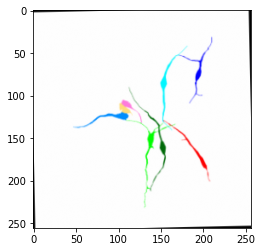

In [ ]:
from skimage.transform import rotate

rot=rotate(Color[0],1.2,resize=False)
plt.imshow(rot)

In [ ]:
aug_list=[1.1,1.2,1.3,1.4,1.5,1.6,1.7,90,180,270]
color_aug=[]
tmp=[]
for i in range(0,len(Color)):
  for j in range(0,len(aug_list)):
    tmp.append(rotate(Color[i],aug_list[j]))
    color_aug.append(tmp[j])

In [ ]:
len(color_aug)

1120

In [ ]:
orig_aug=[]
tmp=[]
for i in range(0,len(Orig)):
  for j in range(0,len(aug_list)):
    tmp.append(rotate(Orig[i],aug_list[j]))
    orig_aug.append(tmp[j])

In [ ]:
len(orig_aug)

1120

In [ ]:
COLOR=np.concatenate((color_aug,Color))

In [ ]:
len(COLOR)

1232

In [ ]:
ORIGIN=np.concatenate((orig_aug,Orig))

In [ ]:
len(ORIGIN)

1232

In [ ]:
filename = '/content/drive/My Drive/Thirdsem/DLforA/assignment5/colon_256.npz'
savez_compressed(filename, COLOR, ORIGIN)
print('Saved dataset: ', filename)

Saved dataset:  /content/drive/My Drive/Thirdsem/DLforA/assignment5/colon_256.npz


In [ ]:
dataset=load_real_samples('/content/drive/My Drive/Thirdsem/DLforA/assignment5/colon_256.npz')

In [ ]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-smlg81up
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-smlg81up
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101066 sha256=cd07ec637936ce9f210d80815aec69f28d19e068fd5867ad797fcc3d3e4c9c76
  Stored in directory: /tmp/pip-ephem-wheel-cache-ewaqaeh_/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [ ]:
L1=[]
L2=[]
L3=[]
L4=[]
G1=[]
G2=[]

In [ ]:
def ap(a,b,c,d,e,f):
  L1.append(a)
  L2.append(b)
  L3.append(c)
  L4.append(d)
  G1.append(e)
  G2.append(f)

In [ ]:
ap(1,1,1,1,1,1)

In [ ]:
L1[0]

1

In [ ]:
savez_compressed('/content/drive/My Drive/Thirdsem/DLforA/assignment5/losses',L1,L2,L3,L4,G1,G2)

In [ ]:
from random import random
from numpy import load
from numpy import zeros
from numpy import ones
from numpy import asarray
from numpy.random import randint
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from matplotlib import pyplot

# define the discriminator model
def define_discriminator(image_shape):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# source image input
	in_image = Input(shape=image_shape)
	# C64
	d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(in_image)
	d = LeakyReLU(alpha=0.2)(d)
	# C128
	d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = InstanceNormalization(axis=-1)(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C256
	d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = InstanceNormalization(axis=-1)(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C512
	d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = InstanceNormalization(axis=-1)(d)
	d = LeakyReLU(alpha=0.2)(d)
	# second last output layer
	d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
	d = InstanceNormalization(axis=-1)(d)
	d = LeakyReLU(alpha=0.2)(d)
	# patch output
	patch_out = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
	# define model
	model = Model(in_image, patch_out)
	# compile model
	model.compile(loss='mse', optimizer=Adam(lr=0.0002, beta_1=0.5), loss_weights=[0.5])
	return model

# generator a resnet block
def resnet_block(n_filters, input_layer):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# first layer convolutional layer
	g = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(input_layer)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# second convolutional layer
	g = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	# concatenate merge channel-wise with input layer
	g = Concatenate()([g, input_layer])
	return g

# define the standalone generator model
def define_generator(image_shape, n_resnet=9):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# image input
	in_image = Input(shape=image_shape)
	# c7s1-64
	g = Conv2D(64, (7,7), padding='same', kernel_initializer=init)(in_image)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# d128
	g = Conv2D(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# d256
	g = Conv2D(256, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# R256
	for _ in range(n_resnet):
		g = resnet_block(256, g)
	# u128
	g = Conv2DTranspose(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# u64
	g = Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# c7s1-3
	g = Conv2D(3, (7,7), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	out_image = Activation('tanh')(g)
	# define model
	model = Model(in_image, out_image)
	return model

# define a composite model for updating generators by adversarial and cycle loss
def define_composite_model(g_model_1, d_model, g_model_2, image_shape):
	# ensure the model we're updating is trainable
	g_model_1.trainable = True
	# mark discriminator as not trainable
	d_model.trainable = False
	# mark other generator model as not trainable
	g_model_2.trainable = False
	# discriminator element
	input_gen = Input(shape=image_shape)
	gen1_out = g_model_1(input_gen)
	output_d = d_model(gen1_out)
	# identity element
	input_id = Input(shape=image_shape)
	output_id = g_model_1(input_id)
	# forward cycle
	output_f = g_model_2(gen1_out)
	# backward cycle
	gen2_out = g_model_2(input_id)
	output_b = g_model_1(gen2_out)
	# define model graph
	model = Model([input_gen, input_id], [output_d, output_id, output_f, output_b])
	# define optimization algorithm configuration
	opt = Adam(lr=0.0002, beta_1=0.5)
	# compile model with weighting of least squares loss and L1 loss
	model.compile(loss=['mse', 'mae', 'mae', 'mae'], loss_weights=[1, 5, 10, 10], optimizer=opt)
	return model

# load and prepare training images
def load_real_samples(filename):
	# load the dataset
	data = load(filename)
	# unpack arrays
	X1, X2 = data['arr_0'], data['arr_1']
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]

# select a batch of random samples, returns images and target
def generate_real_samples(dataset, n_samples, patch_shape):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, patch_shape, patch_shape, 1))
	return X, y

# generate a batch of images, returns images and targets
def generate_fake_samples(g_model, dataset, patch_shape):
	# generate fake instance
	X = g_model.predict(dataset)
	# create 'fake' class labels (0)
	y = zeros((len(X), patch_shape, patch_shape, 1))
	return X, y

# save the generator models to file
def save_models(step, g_model_AtoB, g_model_BtoA):
	# save the first generator model
	filename1 = '/content/drive/My Drive/Thirdsem/DLforA/assignment5/g_model_AtoB_%06d.h5' % (step+1)
	g_model_AtoB.save(filename1)
	# save the second generator model
	filename2 = '/content/drive/My Drive/Thirdsem/DLforA/assignment5/g_model_BtoA_%06d.h5' % (step+1)
	g_model_BtoA.save(filename2)
	print('>Saved: %s and %s' % (filename1, filename2))

# generate samples and save as a plot and save the model
def summarize_performance(step, g_model, trainX, name, n_samples=5):
	# select a sample of input images
	X_in, _ = generate_real_samples(trainX, n_samples, 0)
	# generate translated images
	X_out, _ = generate_fake_samples(g_model, X_in, 0)
	# scale all pixels from [-1,1] to [0,1]
	X_in = (X_in + 1) / 2.0
	X_out = (X_out + 1) / 2.0
	# plot real images
	for i in range(n_samples):
		pyplot.subplot(2, n_samples, 1 + i)
		pyplot.axis('off')
		pyplot.imshow(X_in[i])
	# plot translated image
	for i in range(n_samples):
		pyplot.subplot(2, n_samples, 1 + n_samples + i)
		pyplot.axis('off')
		pyplot.imshow(X_out[i])
	# save plot to file
	filename1 = '/content/drive/My Drive/Thirdsem/DLforA/assignment5/%s_generated_plot_%06d.png' % (name, (step+1))
	pyplot.savefig(filename1)
	pyplot.close()

# update image pool for fake images
def update_image_pool(pool, images, max_size=50):
	selected = list()
	for image in images:
		if len(pool) < max_size:
			# stock the pool
			pool.append(image)
			selected.append(image)
		elif random() < 0.5:
			# use image, but don't add it to the pool
			selected.append(image)
		else:
			# replace an existing image and use replaced image
			ix = randint(0, len(pool))
			selected.append(pool[ix])
			pool[ix] = image
	return asarray(selected)

# train cyclegan models
def train(d_model_A, d_model_B, g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA, dataset):
	# define properties of the training run
  n_epochs, n_batch, = 100, 1
	# determine the output square shape of the discriminator
  n_patch = d_model_A.output_shape[1]
	# unpack dataset
  trainA, trainB = dataset
	# prepare image pool for fakes
  poolA, poolB = list(), list()
	# calculate the number of batches per training epoch
  bat_per_epo = int(len(trainA) / n_batch)
	# calculate the number of training iterations
  n_steps = bat_per_epo * n_epochs
	# manually enumerate epochs
  for i in range(n_steps):
		# select a batch of real samples
    X_realA, y_realA = generate_real_samples(trainA, n_batch, n_patch)
    X_realB, y_realB = generate_real_samples(trainB, n_batch, n_patch)
		# generate a batch of fake samples
    X_fakeA, y_fakeA = generate_fake_samples(g_model_BtoA, X_realB, n_patch)
    X_fakeB, y_fakeB = generate_fake_samples(g_model_AtoB, X_realA, n_patch)
		# update fakes from pool
    X_fakeA = update_image_pool(poolA, X_fakeA)
    X_fakeB = update_image_pool(poolB, X_fakeB)
		# update generator B->A via adversarial and cycle loss
    g_loss2, _, _, _, _  = c_model_BtoA.train_on_batch([X_realB, X_realA], [y_realA, X_realA, X_realB, X_realA])
		# update discriminator for A -> [real/fake]
    dA_loss1 = d_model_A.train_on_batch(X_realA, y_realA)
    dA_loss2 = d_model_A.train_on_batch(X_fakeA, y_fakeA)
		# update generator A->B via adversarial and cycle loss
    g_loss1, _, _, _, _ = c_model_AtoB.train_on_batch([X_realA, X_realB], [y_realB, X_realB, X_realA, X_realB])
		# update discriminator for B -> [real/fake]
    dB_loss1 = d_model_B.train_on_batch(X_realB, y_realB)
    dB_loss2 = d_model_B.train_on_batch(X_fakeB, y_fakeB)
		# summarize performance
    #print('>%d, dA[%.3f,%.3f] dB[%.3f,%.3f] g[%.3f,%.3f]' % (i+1, dA_loss1,dA_loss2, dB_loss1,dB_loss2, g_loss1,g_loss2))
		# evaluate the model performance every so often
    if (i+1) % (bat_per_epo * 1) == 0:
			# plot A->B translation
      ap(dA_loss1,dA_loss2, dB_loss1,dB_loss2, g_loss1,g_loss2)
      summarize_performance(i, g_model_AtoB, trainA, 'AtoB')
			# plot B->A translation
      summarize_performance(i, g_model_BtoA, trainB, 'BtoA')
    if (i+1) % (bat_per_epo * 5) == 0:
			# save the models
      save_models(i, g_model_AtoB, g_model_BtoA)

# load image data
dataset = load_real_samples('/content/drive/My Drive/Thirdsem/DLforA/assignment5/colon_256.npz')
print('Loaded', dataset[0].shape, dataset[1].shape)
# define input shape based on the loaded dataset
image_shape = dataset[0].shape[1:]
# generator: A -> B
g_model_AtoB = define_generator(image_shape)
# generator: B -> A
g_model_BtoA = define_generator(image_shape)
# discriminator: A -> [real/fake]
d_model_A = define_discriminator(image_shape)
# discriminator: B -> [real/fake]
d_model_B = define_discriminator(image_shape)
# composite: A -> B -> [real/fake, A]
c_model_AtoB = define_composite_model(g_model_AtoB, d_model_B, g_model_BtoA, image_shape)
# composite: B -> A -> [real/fake, B]
c_model_BtoA = define_composite_model(g_model_BtoA, d_model_A, g_model_AtoB, image_shape)
# train models
train(d_model_A, d_model_B, g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA, dataset)

savez_compressed('/content/drive/My Drive/Thirdsem/DLforA/assignment5/losses.npz', L1, L2,L3,L4,G1,G2)

FileNotFoundError: ignored

KeyboardInterrupt: ignored